# 情報活用講座：　ケモインフォマテックス 編　
# 第1回：　RDKit操作編

## RDKitライブラリについて

RDKitは、Pythonで使用されるオープンソースの化学情報処理のアプリケーションで、分子の描画、化学構造の解析、化学反応のシミュレーションなどの機能を提供します。

**RDKitの強み**  
RDKitは、分子の構造を分析し、特性を計算するための多くの関数やアルゴリズムを実装し、化学反応の予測や合成経路の設計など、さまざまな化学的なタスクをサポートしています。化学分野で一般的なChemDrawと比較すると、RDKitはプログラミングに基づいたアプローチを取っており、自動化や大規模なデータ処理に適しています。

**RDkitの弱み**  
RDkitそのものは分子構造を画面上からインターラクティブに描くDraw機能は有してはいません。ChemDrawは、直感的なユーザーインターフェースを通じて分子を作成し、編集するための強力な機能を提供しますが、このようなことはRDkitでは行えません。

もう一つのRDKitを利用する場合の留意点があります。それはRDKitはChemDrawファイル（.cdxファイル）の直接的な読み込みをサポートしていません。RDKitは主にSMILES（Simplified Molecular Input Line Entry System）やInChI（International Chemical Identifier）などのテキストベースの化学情報表現を処理するために設計されています。

**RDkitで扱う一般的なファイル構造**  
RDKitは他の形式のファイル（例：SDF、MOL、MOL2など）を読み込むことができます。ChemDrawファイルをRDKitで使用するためには、まずChemDrawファイルをRDKitが読み込める形式に変換する必要があります。

一般的な方法は、ChemDraw自体にはエクスポート機能がありこれを利用します。例えば、RDKitでサポートされているフォーマット（SDF、MOL、MOL2など）に変換し、RDKitで読み込むことができます。

このように両者のアプリケーションを使い分けながら作業やデータ管理を進めてゆくことが肝要です。

## 機械可読性のあるファイルフォーマットついて

以下は、化学構造を扱う一部のファイル形式（MOL、MOL2、SDF, PDB、SMILES、InChI）に関する定義と使い方をまとめたものです。

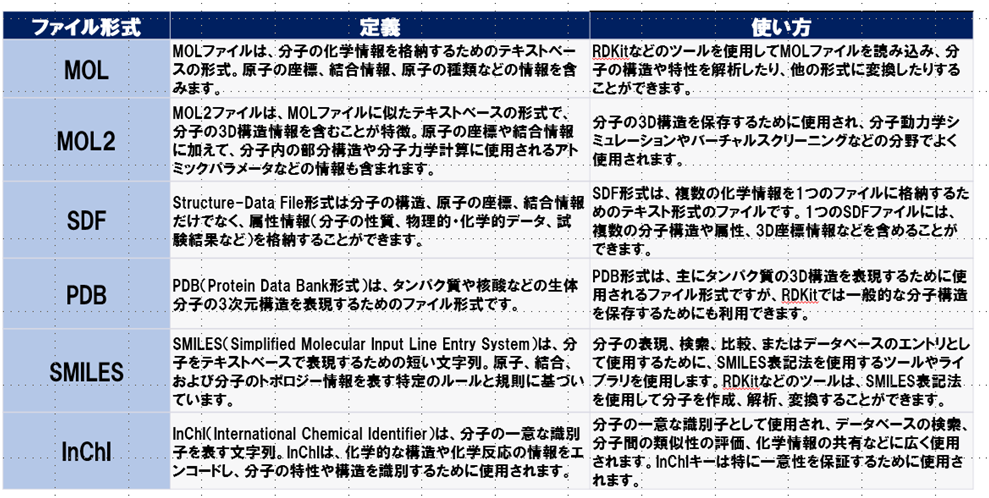

### ライブラリのインポート

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

## 1.分子構造の読み込み

ここでは、解熱鎮痛剤のアセチルサリチル酸（アスピリン）を例に

### MOLファイルからの読み込みの場合

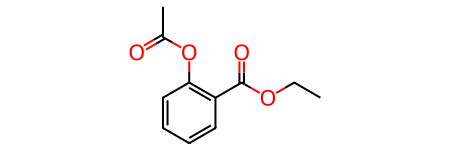

In [2]:
file ='./data/Aspirin.mol'
mol_mol = Chem.MolFromMolFile(file)
mol_mol

【解説】  `Chem.MolFromMolFile`関数  
`Chem.MolFromMolFile`関数は、MOLファイルからRDKitのMolオブジェクトを作成するために使用されます。

MOLファイルは、分子の化学構造情報を含むテキストファイルの形式です。`Chem.MolFromMolFile`関数は、指定されたMOLファイルを読み込み、RDKitの`Mol`オブジェクトを返します。この`Mol`オブジェクトは、分子の構造と属性を表現するためのデータモデルです。

以下は、`Chem.MolFromMolFile`関数の基本的な使用例です。

```python
from rdkit import Chem
mol = Chem.MolFromMolFile('input.mol')
```

このコードでは、`input.mol`というファイルから分子を読み込んでいます。`Chem.MolFromMolFile`関数は、指定されたMOLファイルを解析し、RDKitの`Mol`オブジェクトを返します。`mol`変数には、作成された`Mol`オブジェクトが格納されます。

MOLファイルが不正確なフォーマットやエラーがある場合、関数は適切なエラーメッセージを返すか、`None`を返す場合があります。

### SDFファイルからの読み込みの場合

In [3]:
file ='./data/aspirin-3D-structure-CT1001395514.sdf'
sdf = Chem.SDMolSupplier(file)
sdf

In [4]:
for mol in sdf:
    if mol is not None:
        # 分子の処理
        print(Chem.MolToSmiles(mol))

CC(=O)Oc1ccccc1C(=O)O


【解説】`Chem.SDMolSupplier`関数  
`Chem.SDMolSupplier`関数 は、RDKitでSDF（Structure-Data File）形式のファイルを読み込むためのクラスです。

SDFファイルは、分子構造と関連するデータを含むテキストファイル形式です。
`Chem.SDMolSupplier`クラスは、イテレータとして機能し、ファイルから分子を順番に読み込むことができます。各分子は`Chem.Mol`オブジェクトとして提供されます。

以下は、`Chem.SDMolSupplier`の基本的な使い方を示す例です。

```python
from rdkit import Chem

supplier = Chem.SDMolSupplier('input.sdf')

for mol in supplier:
    if mol is not None:
        # 分子の処理
        print(Chem.MolToSmiles(mol))
```

この例では、'input.sdf'というSDFファイルを`Chem.SDMolSupplier`で読み込みます。イテレータとして使われるため、`for`ループ内で分子を一つずつ取得することができます。

取得した分子は、`mol`変数に格納されます。ただし、一部の分子は正しく読み込むことができない場合があるため、`mol`が`None`でないことを確認する必要があります。

`mol`オブジェクトを使用して、各分子の処理を行うことができます。上記の例では、`Chem.MolToSmiles`関数を使用して分子をSMILES形式に変換し、表示しています。

`Chem.SDMolSupplier`クラスには、さまざまなオプションを指定することもできます。たとえば、異なる分子ブロックからの読み込みや、特定のプロパティのみを読み込むなどの設定が可能です。詳細なオプションの使用方法については、RDKitの公式ドキュメントを参照してください。

### SMILES構造から読み込みの場合

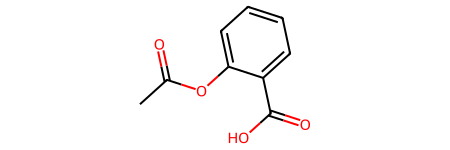

In [5]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol_smiles = Chem.MolFromSmiles(smiles)
mol_smiles

【解説】 `Chem.MolFromSmiles`関数   
SMILESは、分子構造をテキストベースで表現するための表記法であり、化学情報を短い文字列で表現することができます。`Chem.MolFromSmiles`関数は、SMILES（Simplified Molecular Input Line Entry System）形式の文字列を受け取り、それをRDKitのMolオブジェクトに変換します。

以下は、`Chem.MolFromSmiles`関数の基本的な使い方の例です。

```python
from rdkit import Chem

smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
```

この例では、"CC(=O)Oc1ccccc1C(=O)O"というSMILES文字列が与えられています。`Chem.MolFromSmiles`関数はこのSMILES文字列を解析し、分子の構造を表すMolオブジェクトを返します。

Molオブジェクトは、RDKitにおける分子情報を表すためのクラスであり、原子や結合の情報、立体情報、分子の特性などを保持します。Molオブジェクトを使うことで、分子構造の解析や変換、分子の特性の計算など、様々な分子情報処理の操作を行うことができます。

なお、`Chem.MolFromSmiles`関数は、与えられたSMILES文字列が無効な場合や解析できない場合にはNoneを返します。そのため、返り値を適切にチェックすることが重要です。

## 2. 分子構造の表示・可視化

### 単一の分子を表示

In [6]:
from rdkit.Chem import Draw
img = Draw.MolToImage(mol_smiles)
img.show()

【解説】`Draw.MolToImage`関数    
`Draw.MolToImage`関数は、RDKitの`Mol`オブジェクトを画像として描画するために使用されます。以下は、`Draw.MolToImage`関数の基本的な使用例です。

```python
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles('CCO')
img = Draw.MolToImage(mol)
img.show()
```

このコードでは、SMILES表記法で指定された分子を`Chem.MolFromSmiles`関数を使用して作成し、`Draw.MolToImage`関数を使用して分子を画像として描画します。`MolToImage`関数は、`PIL`（Python Imaging Library）の画像オブジェクトを返します。`img.show()`を使用することで、画像が表示されます。

Jupyter Notebookでは、`Chem.Draw`モジュールの`IPythonConsole`をインポートさせておくことでRDKitモジュールが正しくインストールされている場合、`Mol`オブジェクトを直接表示することもできます。`Mol`オブジェクトの表示には、RDKitが組み込みのJupyter拡張機能を使用しているため、追加のコードは必要ありません。

RDKitの`Draw.MolToImage`関数は、カスタマイズされた分子の描画やイメージの保存など、さまざまなオプションを提供します。しかし、基本的な分子の表示を行う場合には、Jupyter Notebook上で`Mol`オブジェクトを直接表示することが便利です。

### 複数の分子をまとめて表示

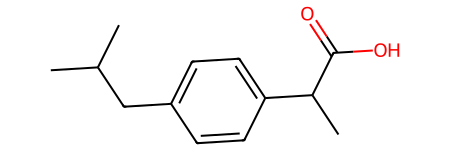

In [7]:
# イブプロフェン
smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"
ibuprofen = Chem.MolFromSmiles(smiles)
ibuprofen

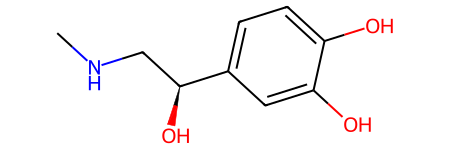

In [8]:
# エピネフリン（アドレナリン）
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

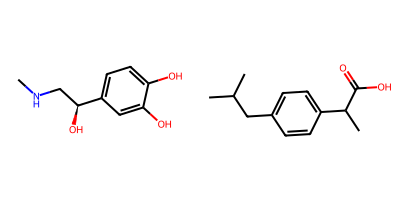

In [9]:
img2 = Draw.MolsToGridImage([epinephrine,ibuprofen], molsPerRow=2)
img2

【解説】`Draw.MolsToGridImage`関数  

`Draw.MolsToGridImage`関数は、複数のRDKitの`Mol`オブジェクトをグリッド形式の画像として描画するために使用されます。以下は、`Draw.MolsToGridImage`関数の基本的な使用例です。

```python
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('CNC'), Chem.MolFromSmiles('CCN')]
img = Draw.MolsToGridImage(mols, molsPerRow=3)
img.show()
```

`molsPerRow`パラメータは、1行あたりの分子の数を指定します。この例では、3つの分子が1行に表示されます。

`MolsToGridImage`関数は、`PIL`（Python Imaging Library）の画像オブジェクトを返します。`img.show()`を使用することで、画像が表示されます。

`MolsToGridImage`関数には、さまざまなオプションがあります。たとえば、`legends`パラメータを使用して各分子のキャプションを指定したり、`highlightAtomLists`や`highlightBondLists`パラメータを使用して特定の原子や結合をハイライトしたりすることもできます。さらに、出力画像のサイズやスケーリング、カラースキームなどもカスタマイズすることができます。

### 複数の分子をまとめて表示２

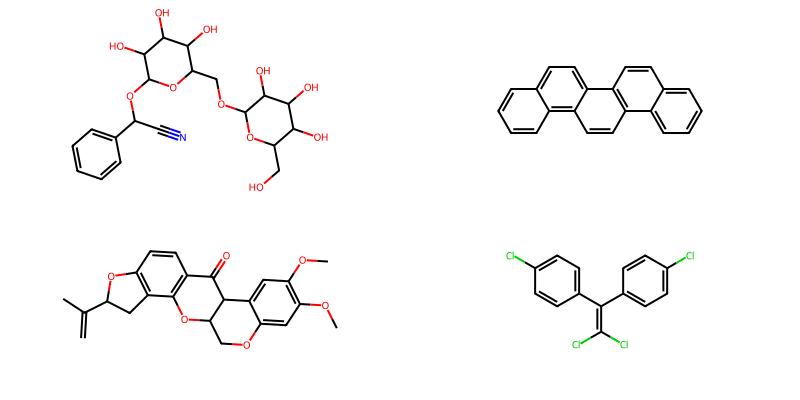

In [17]:
smiles = [
    'N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1',
    'c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21',
    'C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1',
    'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1'
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400, 200))

## 3. 分子構造の保存
RDKitを使用して分子構造を保存するには、`Chem.rdchem.Mol`オブジェクトをファイルに書き出す必要があります。RDKitは複数のファイル形式に対応しており、一般的な形式としてはMOL、SDF、PDB、SMILESなどがあります。

### 1. MOLファイル形式で保存する場合：  
`MolToMolFile`関数を使います。SMILES表記法から`Mol`オブジェクトを作成し、`Chem.MolToMolFile`関数を使用してMOLファイルに保存しています。第1引数に保存する`Mol`オブジェクトを指定し、第2引数に保存するファイル名を指定します。

In [11]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
Chem.MolToMolFile(mol, 'aspirin_rdkit.mol')

### 2. SDFファイル形式で保存する場合：
上記のコードでは、SMILES表記法から`Mol`オブジェクトを作成し、`Chem.SDWriter`オブジェクトを使用してSDFファイルに保存しています。`write`メソッドを使用して`Mol`オブジェクトを書き込み、`close`メソッドを使用してファイルを閉じます。

In [12]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
writer = Chem.SDWriter('aspirin_rdkit.sdf')
writer.write(mol)
writer.close()

### 3. PDBファイル形式で保存する場合：
上記のコードでは、SMILES表記法から`Mol`オブジェクトを作成し、`Chem.PDBWriter`オブジェクトを使用してPDBファイルに保存しています。`write`メソッドを使用して`Mol`オブジェクトを書き込み、`close`メソッドを使用してファイルを閉じます。

In [13]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
writer = Chem.PDBWriter('aspirin_rdkit.pdb')
writer.write(mol)
writer.close()

### 4. SMILES形式で保存する場合：
上記のコードでは、SMILES表記法から`Mol`オブジェクトを作成し、`Chem.MolToSmiles`関数を使用してSMILES形式の文字列に変換します。その後、ファイルを開いてSMILES文字列を書き込みます。

In [14]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
with open('aspirin_rdkit.smi', 'w') as f:
    f.write(smiles)

In [15]:
img = Draw.MolsToGridImage( [epinephrine,ibuprofen], molsPerRow=2)

#img.save('./molecules.jpg')
# Jupyterでsaveする場合には以下の通り

with open('sample.png', mode='wb') as f:
    f.write(img.data)